In [2]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
%run Preprocessing.py

In [4]:
df = pd.read_csv("austin_weather.csv")

In [5]:
X_train, X_test, y_train, y_test, X_val, y_val = preprocess(df)

In [6]:
# We will train for Rain first
y_train_thunderstorm = y_train["Thunderstorm"]
y_val_thunderstorm = y_val["Thunderstorm"]

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [15]:
params = {'n_neighbors': [3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,93,95,97,99],
'weights' : ['uniform', 'distance'],
'metric' : ['euclidean', 'manhattan', 'minkowski'],
'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}

knn = KNeighborsClassifier()
clf = GridSearchCV(knn, params, cv=5, verbose=1, n_jobs=-1)
clf.fit(X_train, y_train_thunderstorm)

Fitting 5 folds for each of 1176 candidates, totalling 5880 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29, 31, 33, 35, 37, 39, 41, 43,
                                         45, 47, 49, 51, 53, 55, 57, 59, 61, ...],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [16]:
print(classification_report(y_val_thunderstorm, clf.predict(X_val)))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       165
           1       0.83      0.45      0.59        33

    accuracy                           0.89       198
   macro avg       0.87      0.72      0.76       198
weighted avg       0.89      0.89      0.88       198



<AxesSubplot: >

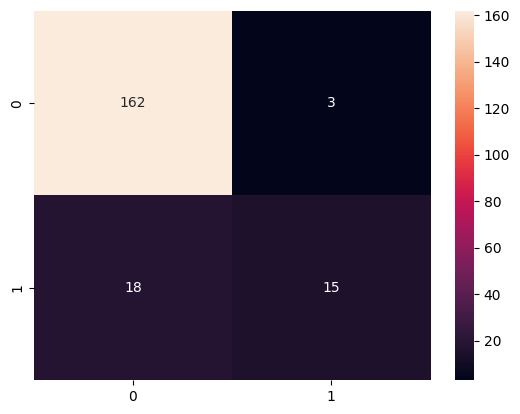

In [17]:
cm = confusion_matrix(y_val_thunderstorm, clf.predict(X_val))
sns.heatmap(cm, annot=True, fmt="d")